# Завдання

На цьому тижні ми вивчили як працюють рекомендаційні системи. Пропонуємо вам познайомитись з бібліотекою surprise, котра якраз є по суті додатком до знайомої нам бібліотеки scikit-learn для тренування моделей рекомендаційних систем.

Візьміть датасет movielens і побудуйте модель матричної факторизації. У даній бібліотеці він має назву SVD. Підберіть найкращі параметри за допомогою крос-валідації, також поекспериментуйте з іншими алгоритмами розрахунків (SVD++, NMF) і оберіть той, який буде оптимальним.

Підказки як саме побудувати дану модель ви знайдете в документації до даної бібліотеки.

In [12]:
import pandas as pd

from surprise import Dataset, accuracy
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import SVD, SVDpp, NMF

In [19]:
data = Dataset.load_builtin('ml-100k')

In [3]:
df = pd.DataFrame(data.raw_ratings, columns=["user_id", "item_id", "rating", "unix_timestamp"])
df.head()

,user_id,item_id,rating,unix_timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [ ]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

## SVD

In [4]:
svd_model = SVD()
cross_validate(svd_model, data, measures=['rmse', 'mae'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9349  0.9409  0.9385  0.9396  0.9290  0.9366  0.0043  
MAE (testset)     0.7344  0.7449  0.7406  0.7390  0.7313  0.7380  0.0047  
Fit time          0.96    0.98    0.93    0.91    0.92    0.94    0.03    
Test time         0.13    0.16    0.10    0.14    0.09    0.12    0.03    


{'test_rmse': array([0.93488894, 0.94090194, 0.93846925, 0.93964929, 0.92895996]),
 'test_mae': array([0.73440328, 0.74485409, 0.74063141, 0.73901543, 0.73130792]),
 'fit_time': (0.9645340442657471,
  0.9753601551055908,
  0.9283120632171631,
  0.913409948348999,
  0.9159839153289795),
 'test_time': (0.12502026557922363,
  0.16096782684326172,
  0.0953817367553711,
  0.14435291290283203,
  0.0947868824005127)}

In [14]:
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 30], 'lr_all': [0.005, 0.01], 'reg_all': [0.02, 0.1]}

grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search_svd.fit(data)

print("Best SVD Params:", grid_search_svd.best_params['rmse'])
print("Best SVD RMSE:", grid_search_svd.best_score['rmse'])

best_svd = grid_search_svd.best_estimator['rmse']

best_svd.fit(trainset)

predictions = best_svd.test(testset)

mae = accuracy.mae(predictions)
rmse_svd = accuracy.rmse(predictions)

print(f'MAE on test set: {mae}')
print(f'RMSE on test set: {rmse_svd}')

Best SVD Params: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
Best SVD RMSE: 0.9204983304335665
MAE:  0.7214
RMSE: 0.9123
MAE on test set: 0.721359620593183
RMSE on test set: 0.9122835302677863


## SVD++

In [15]:
svdpp_model = SVDpp()
cross_validate(svdpp_model, data, measures=['rmse', 'mae'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9256  0.9310  0.9258  0.9275  0.0025  
MAE (testset)     0.7287  0.7311  0.7260  0.7286  0.0021  
Fit time          10.01   10.81   10.30   10.37   0.33    
Test time         5.64    5.36    5.54    5.51    0.11    


{'test_rmse': array([0.92558215, 0.93102376, 0.92575076]),
 'test_mae': array([0.7287121 , 0.73111596, 0.72604126]),
 'fit_time': (10.014595031738281, 10.809375047683716, 10.295012712478638),
 'test_time': (5.635013818740845, 5.363752126693726, 5.537310838699341)}

In [17]:
grid_search_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search_svdpp.fit(data)

print("Best SVD Params:", grid_search_svdpp.best_params['rmse'])
print("Best SVD RMSE:", grid_search_svdpp.best_score['rmse'])

best_svdpp = grid_search_svdpp.best_estimator['rmse']

best_svdpp.fit(trainset)

predictions_svdpp = best_svdpp.test(testset)

mae_svdpp = accuracy.mae(predictions_svdpp)
rmse_svdpp = accuracy.rmse(predictions_svdpp)

print(f'MAE on test set: {mae_svdpp}')
print(f'RMSE on test set: {rmse_svdpp}')

Best SVD Params: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
Best SVD RMSE: 0.9169555129557528
MAE:  0.7191
RMSE: 0.9105
MAE on test set: 0.7191146246126449
RMSE on test set: 0.9105410518903249


## NMF

In [16]:
nmf_model = NMF()
cross_validate(nmf_model, data, measures=['rmse', 'mae'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9705  0.9785  0.9793  0.9761  0.0040  
MAE (testset)     0.7619  0.7696  0.7688  0.7668  0.0035  
Fit time          1.38    1.46    1.42    1.42    0.03    
Test time         0.22    0.21    0.13    0.19    0.04    


{'test_rmse': array([0.97045212, 0.97850113, 0.97929391]),
 'test_mae': array([0.76188914, 0.76963922, 0.76876046]),
 'fit_time': (1.383734941482544, 1.4567558765411377, 1.424785852432251),
 'test_time': (0.22281122207641602, 0.21476316452026367, 0.13267111778259277)}

In [23]:
param_grid_nmf = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30],
    'reg_pu': [0.06, 0.1],
    'reg_qi': [0.06, 0.1]
}

grid_search_nmf = GridSearchCV(NMF, param_grid_nmf, measures=['rmse', 'mae'], cv=3)
grid_search_nmf.fit(data)

print("Best NMF Params:", grid_search_nmf.best_params['rmse'])
print("Best NMF RMSE:", grid_search_nmf.best_score['rmse'])

best_nmf = grid_search_nmf.best_estimator['rmse']

best_nmf.fit(trainset)

predictions_nmf = best_nmf.test(testset)

mae_nmf = accuracy.mae(predictions_nmf)
rmse_nmf = accuracy.rmse(predictions_nmf)

print(f'MAE on test set: {mae_nmf}')
print(f'RMSE on test set: {rmse_nmf}')

Best NMF Params: {'n_factors': 50, 'n_epochs': 30, 'reg_pu': 0.1, 'reg_qi': 0.1}
Best NMF RMSE: 1.0318621937786012
MAE:  0.7869
RMSE: 1.0315
MAE on test set: 0.7868967068834198
RMSE on test set: 1.0314524259007571


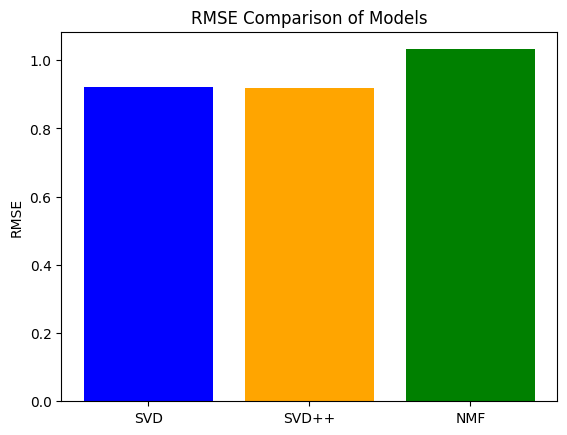

In [24]:
import matplotlib.pyplot as plt

models = ['SVD', 'SVD++', 'NMF']
rmse_scores = [grid_search_svd.best_score['rmse'],
               grid_search_svdpp.best_score['rmse'],
               grid_search_nmf.best_score['rmse']]

plt.bar(models, rmse_scores, color=['blue', 'orange', 'green'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.show()
